# Assignment 7

In [55]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import expon

## Exercise 1 

Implement Hamiltonian Monte Carlo (HMC) method in which “momentum” variables are sampled and updated in the usual way (presented in lecture notes and Neal). Use your algorithm to sample from one-dimensional exponential distribution 𝑋 ~ 𝐸𝑥𝑝(𝜆), where 𝜆 = 2. Use 𝐿 = 25 for the number of leapfrog steps. Try picking the step size of 𝜀 = 0.1 (see the note above). You must be sampling only for 𝑥 ≥ 0, because 𝐸𝑥𝑝(∙) is only defined there. (Refer to Lecture 1, p.38, for the exponential distribution.) In order to sample only on the support of 𝐸𝑥𝑝(∙) you must impose constraints: implement these in your HMC algorithm.

(i) (w=2) First you need to determine 𝑈(𝑞). Derive the correct form 𝑈(𝑞) = 𝜆𝑞 − ln 𝜆.


**Answer**: 

$U(q) = - \ln p(q)$

We know $p(x) = \lambda \exp(-\lambda x)$

=> $U(q) = - \ln (\lambda \exp(-\lambda q))$

=> $U(q) = - \ln \lambda  - \ln (\exp(-\lambda q))$

=> $U(q) = - \ln \lambda + \lambda q$

or 

=> $U(q) = \lambda q - \ln \lambda $

Hence shown. 


(ii) (w=1) What is the minimal form of 𝑈(𝑞) that does the job for HMC. Why?


**Answer**: 
    
The minimal form is: 

$U(q) = \lambda q$

The reason is that the constants do not affect gradient and cancels out when calculating the change in total energy for the Metropolis acceptance ratio. Hence, it does the job for HMC. 

(iii) (w=1) Write down the constraints for this case. You can do this either by writing
lines of pseudo code or by indicating clearly where the constraints are in your HMC
algorithm.


**Answer**: 

In Hamiltonian dynamics, constraints are elastic collisions of the imaginary particle with boundaries i.e. positions are mirrored w.r.t boundaries (q < 0). 

This happens inside the leapfrog algorithm 

```
for i in range(L): 
    # Full step for position
    q = q + epsilon * p / m
    
    # CONSTRAINT 
    if q < 0:
        q = -q  # Reflect position
        p = -p  # Reflect momentum
```

(iv) (w=3) Simulate 𝐸𝑥𝑝(2) using your HMC. Use $10^6$ samples. Plot the distribution as a
histogram using 50 bins together with the pdf of 𝐸𝑥𝑝(2) (linear scale/axes are fine).


In [56]:
def U(q, lambda_val):
    return lambda_val*q

def grad_U(q, lambda_val):
    return lambda_val

def hmc_exp(n_samples, q_init, lambda_val, L, epsilon):
    
    
    samples = []
    q_current = q_init
    
    n_accepted = 0
    
    
    for i in range(n_samples):
        
        q = q_current
        
        p0 = np.random.normal(0,1)
        p = p0 - (epsilon/2)*grad_U(q, lambda_val)
    
        H_old = U(q, lambda_val) + (p**2) / 2
        
        
        
        for i in range(L): 
            
            q = q + epsilon*p
            
            # constraints
            if q < 0: 
                q = -q
                p = -p 
                
            if i < L - 1:
                p = p - epsilon * grad_U(q, lambda_val)
            
            
        p = p - (epsilon/2)*grad_U(q, lambda_val)
        
        p = -p
        
        H_new = U(q, lambda_val) + (p**2)/2
        
        delta_H = H_old - H_new
        alpha = np.exp(delta_H)
        
        if np.random.rand() < alpha:
            q_current = q
            n_accepted += 1
            
        samples.append(q_current)
        
    
    return np.array(samples)
            
        
        

In [57]:
lambda_val = 2
L = 25
epsilon = 0.1
n_samples = 10**6
q_init = 1.0

samples = hmc_exp(n_samples, q_init, lambda_val, L, epsilon)

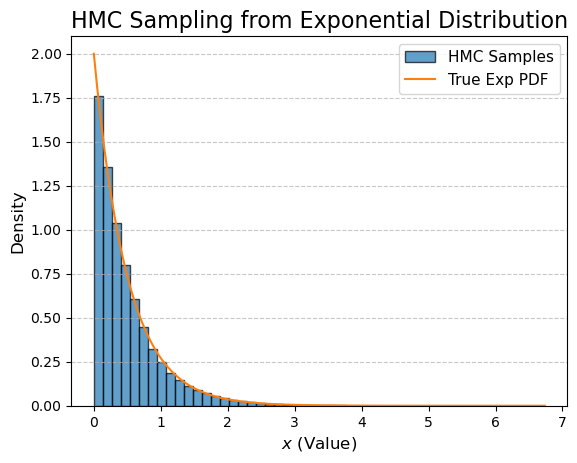

In [58]:
plt.hist(samples, bins=50, density=True, label=f'HMC Samples', 
             alpha=0.7, edgecolor='black')
    
x_max = np.max(samples)
x_pdf = np.linspace(0, x_max, 400)
y_pdf = expon.pdf(x_pdf, scale=1/lambda_val) 
plt.plot(x_pdf, y_pdf, label=f'True Exp PDF')

plt.title(f'HMC Sampling from Exponential Distribution', fontsize=16)
plt.xlabel('$x$ (Value)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

(v) (w=1) Report the value of 𝜀 you used (see below).

**Answer:**

The value of: 
$\epsilon = 0.1$

If you succeed in your implementation, the histogram should follow the pdf quite well (of
course the binning is rather sparse, so you’ll see this in the graph) and that’s it, you’re
done. If you don’t succeed in getting the pdf too well, you can try decreasing 𝜺. Report
the 𝜺 that will give a reasonable alignment. (You’ll get slightly less points for having to use
𝜀 < 0.1.)

Hint. When deriving 𝑈(𝑞) you will find the identity
𝐴 exp(−𝐵) = exp [ln(𝐴) − 𝐵] useful.

Note. The usual warning of python functions: Check the parametrization of the library
functions you decide to use.